<a href="https://colab.research.google.com/github/Polina2508/Neuron/blob/main/neuronka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-plot

In [4]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

Создаем датафрейм для чтения и анализа данных


In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/neu/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/neu/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('/content/drive/MyDrive/neu/val.txt', header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [6]:
df_train.Sentiment.value_counts()

joy         5064
sadness     4099
anger       2159
fear        1937
love        1304
surprise     572
cry          567
thanks       298
Name: Sentiment, dtype: int64

Читаем данные обущения и проверки

In [7]:
X=df_train['Input']

In [8]:
l=[]
for i in X:
  l.append(len(i))

In [9]:
len1=pd.DataFrame(l)
len1.describe()

,0
count,16000.000000
mean,96.845750
std,55.905329
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


Исправляем длину ввода встраиваемых слоев

In [10]:
c=[]
for i in range(7,301):
   ct=0
   for k in l:
     if k==i:
       ct+=1
   c.append(ct)

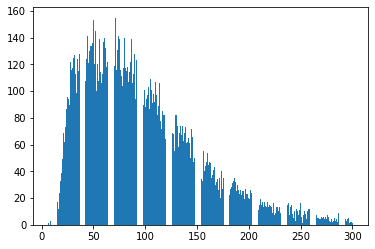

In [11]:
plt.bar(range(7,301),c)
plt.show()

Преобразовываем предложения в векторы слов

In [12]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [13]:
len(tokenizer.word_index)

15214

In [14]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [15]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5, 'cry':6, 'thanks':7})

In [16]:
Y_train=df_train['Sentiment'].values

one hot encoding. преобразовывем данные в матрицу

In [17]:
Y_train_f=to_categorical(Y_train)

In [18]:
Y_train_f[:6]

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [19]:
X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5, 'cry':6, 'thanks':7})

In [20]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [21]:
Y_val_f=to_categorical(Y_val)

In [22]:
Y_val_f[:6]

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

Создаем модель нейронки

In [24]:
model=Sequential()
model.add(Embedding(15214,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(8,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 64)            973696    
_________________________________________________________________
dropout (Dropout)            (None, 80, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense (Dense)                (None, 8)                 2568      
Total params: 1,479,944
Trainable params: 1,479,944
Non-trainable params: 0
_________________________________________________________________
None


Запускаем модель

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
hist=model.fit(X_train_pad,Y_train_f,epochs=15,validation_data=(X_val_pad,Y_val_f))

Epoch 1/15
500/500 [==============================] - 228s 445ms/step - loss: 1.6726 - accuracy: 0.3755 - val_loss: 1.4604 - val_accuracy: 0.4650
Epoch 2/15
500/500 [==============================] - 214s 429ms/step - loss: 0.8044 - accuracy: 0.7092 - val_loss: 1.0490 - val_accuracy: 0.6560
Epoch 3/15
500/500 [==============================] - 216s 431ms/step - loss: 0.5022 - accuracy: 0.8402 - val_loss: 1.0042 - val_accuracy: 0.6690
Epoch 4/15
500/500 [==============================] - 216s 432ms/step - loss: 0.3941 - accuracy: 0.8732 - val_loss: 0.9403 - val_accuracy: 0.6795
Epoch 5/15
500/500 [==============================] - 216s 431ms/step - loss: 0.3392 - accuracy: 0.8901 - val_loss: 0.9528 - val_accuracy: 0.6845
Epoch 6/15
500/500 [==============================] - 214s 429ms/step - loss: 0.3116 - accuracy: 0.8990 - val_loss: 0.8920 - val_accuracy: 0.6825
Epoch 7/15
500/500 [==============================] - 213s 425ms/step - loss: 0.2824 - accuracy: 0.9042 - val_loss: 0.9074 -

Строим графики потерь и точности

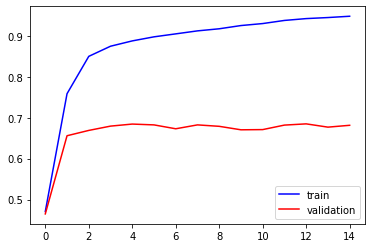

In [27]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

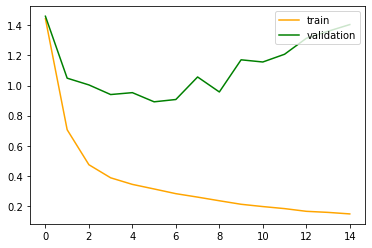

In [28]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

Проверка тестовых данных

In [29]:
X_test=df_test['Input']
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5, 'cry':6, 'thanks':7})

In [30]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [31]:
Y_test_f=to_categorical(Y_test)

In [32]:
X_test_pad.shape

(2000, 80)

In [33]:
Y_test_f[:7]

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Точность тестовых данных

In [34]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 8s 125ms/step - loss: 1.3283 - accuracy: 0.6955


[1.3282802104949951, 0.6955000162124634]

Построение матрицы путаницы(хз нужно ли)

In [35]:
Y_pred=np.argmax(model.predict(X_test_pad), axis=-1)


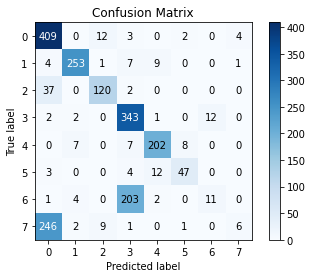

In [36]:
plot_confusion_matrix(Y_test,Y_pred)

In [37]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.95      0.72       430
           1       0.94      0.92      0.93       275
           2       0.85      0.75      0.80       159
           3       0.60      0.95      0.74       360
           4       0.89      0.90      0.90       224
           5       0.81      0.71      0.76        66
           6       0.48      0.05      0.09       221
           7       0.55      0.02      0.04       265

    accuracy                           0.70      2000
   macro avg       0.71      0.66      0.62      2000
weighted avg       0.68      0.70      0.62      2000



Финалочка

In [61]:
def get_key(value):
    dictionary={'😋':0,'😡':1,'😍':2,'😪':3,'😰':4,'🤪':5, '😭️':6, '🤗️':7}
    for key,val in dictionary.items():
          if (val==value):
            return key

In [172]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=8,padding='post')
  ans=get_key(np.argmax(sentence_padded))
  print(sentence,ans)
  print(sentence_padded)
    
  
 

  

In [173]:
predict(str(input('Enter a massage : ')))


Enter a massage : i hate you
i hate you 😡
[[  2 232  31   0   0   0   0   0]]
